In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
car = pd.read_csv("CarPrice.csv")

In [3]:
car.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
181,182,-1,toyouta tercel,gas,std,four,wagon,rwd,front,104.5,...,161,mpfi,3.27,3.35,9.20,156,5200,19,24,15750.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.40,112,6600,26,29,9538.0
176,177,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,10898.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.10,60,5500,38,42,5399.0
175,176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.70,92,4200,27,32,9988.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
171,172,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.30,116,4800,24,30,11549.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.00,70,4800,30,37,6938.0
112,113,0,peugeot 604sl,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.70,3.52,21.00,95,4150,28,33,16900.0


In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
le = LabelEncoder()

In [8]:
for i in car:
    if i == 'CarName':
        continue
    if car[i].dtype == 'object':
        car[i] = le.fit_transform(car[i])

In [9]:
X=car.drop(['CarName','price'],axis=1)
Y=car['price']

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,Y_train)

LinearRegression()

In [13]:
train_data_prediction = model.predict(X_train)

In [14]:
error_score = metrics.r2_score(Y_train,train_data_prediction)

In [15]:
print(f"R Squared Error : {error_score}")

R Squared Error : 0.9011243034897009


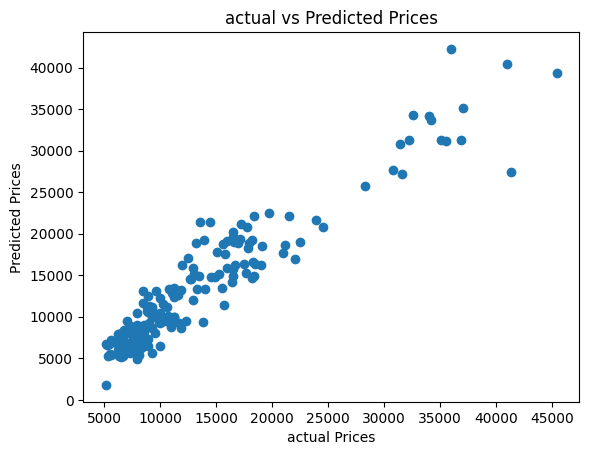

In [16]:
#Visualizing The Actual and Predicted Prices
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("actual Prices")
plt.ylabel("Predicted Prices")
plt.title("actual vs Predicted Prices")
plt.show()

In [17]:
test_data_prediction = model.predict(X_test)

In [18]:
error_score2 = metrics.r2_score(Y_test,test_data_prediction)

In [19]:
print(f"R Squared Error : {error_score2}")

R Squared Error : 0.7752745136880321


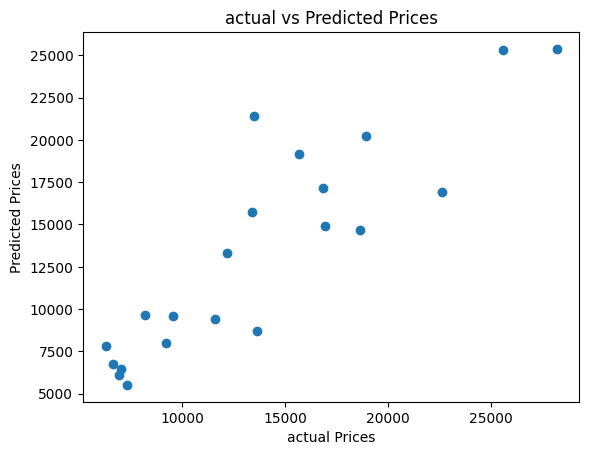

In [20]:
#Visualizing The Actual and Predicted Prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("actual Prices")
plt.ylabel("Predicted Prices")
plt.title("actual vs Predicted Prices")
plt.show()